In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#clean up csv format for easier processing, when called in next cell
def scrub_data(res): 
    res = res.rename(columns= {"Unnamed: 0": "index"})
    groups = list(res["Groups"])
    groups2 = []
    for name in groups:
        if '\t' in name:
            groups2.append(name.replace('\t',''))
        else: 
            groups2.append(name)
        #print (name)
    res["Groups"] = pd.Series(groups2)
    
    return res

In [3]:
#read in each result ad clean format
res_null = pd.read_csv('alliancetribes.csv')
res_one = pd.read_csv('alliancetribes_one.csv')
res_two =pd.read_csv('alliancetribes_many.csv')

res_null = scrub_data(res_null)
res_one = scrub_data(res_one)
res_two =scrub_data(res_two)
res_two.head()

,index,Affinity,Compromise,Efficieny,Groups,Power,Run
0,0,NEW RUN,NEW RUN,NEW RUN,NEW RUN,NEW RUN,0
1,1,0.9255319148936169,0.1,1.1,Unaffiliated3,0.45,0
2,2,0.5212765957446809,0.1,1.1,Saada20,1.05,0
3,3,0.5212765957446809,0.1,1.1,Zawayia3,1.3,0
4,4,0.5212765957446809,0.1,1.1,Taureg2,1.8,0


In [4]:
#create a data strcuture to analyze the results, place in parameters based on run number
results0 = {}
results1 = {}
results2 = {}

results = ([res_null,results0], [res_one,results1], [res_two,results2])
for res in results: 
    for each in res[0].iterrows(): 
        #print (each[1])
        if each[1]['Compromise'] != "NEW RUN" and each[1]['Run'] not in res[1] : 
            res[1][each[1]['Run']] = {"Comp": each[1]['Compromise'], "Efficieny": each[1]["Efficieny"], "Tribes": []}
results[0][1]

{0: {'Comp': '0.1', 'Efficieny': '1.1', 'Tribes': []},
 1: {'Comp': '0.1', 'Efficieny': '1.2', 'Tribes': []},
 2: {'Comp': '0.1', 'Efficieny': '1.25', 'Tribes': []},
 3: {'Comp': '0.1', 'Efficieny': '1.3', 'Tribes': []},
 4: {'Comp': '0.1', 'Efficieny': '1.35', 'Tribes': []},
 5: {'Comp': '0.1', 'Efficieny': '1.4', 'Tribes': []},
 6: {'Comp': '0.1', 'Efficieny': '1.45', 'Tribes': []},
 7: {'Comp': '0.1', 'Efficieny': '1.5', 'Tribes': []},
 8: {'Comp': '0.1', 'Efficieny': '1.55', 'Tribes': []},
 9: {'Comp': '0.1', 'Efficieny': '1.6', 'Tribes': []},
 10: {'Comp': '0.1', 'Efficieny': '1.7', 'Tribes': []},
 11: {'Comp': '0.1', 'Efficieny': '1.8', 'Tribes': []},
 12: {'Comp': '0.1', 'Efficieny': '1.9', 'Tribes': []},
 13: {'Comp': '0.1', 'Efficieny': '2.0', 'Tribes': []},
 14: {'Comp': '0.1', 'Efficieny': '3', 'Tribes': []},
 15: {'Comp': '0.2', 'Efficieny': '1.1', 'Tribes': []},
 16: {'Comp': '0.2', 'Efficieny': '1.2', 'Tribes': []},
 17: {'Comp': '0.2', 'Efficieny': '1.25', 'Tribes': []},

In [5]:
#Read in coalitions form data table and plae in Tribes dictionary
for res in results: 
    for each in res[0].iterrows(): 
        #print (each[1])
        for k in res[1].keys(): 
            if each[1]["Run"] == k:
                if each[1]["Groups"] != "NEW RUN" and  each[1]["Groups"] not in res[1][k]["Tribes"]:
                    res[1][k]['Tribes'].append([each[1]["Groups"], each[1]["Power"], each[1]['Affinity']])
results[2][1]

{0: {'Comp': '0.1',
  'Efficieny': '1.1',
  'Tribes': [['Unaffiliated3', '0.45', '0.9255319148936169'],
   ['Saada20', '1.05', '0.5212765957446809'],
   ['Zawayia3', '1.3', '0.5212765957446809'],
   ['Taureg2', '1.8', '0.5212765957446809'],
   ['Marghara8', '2.05', '0.7340425531914894'],
   ['al-Awaqir', '2.3499999999999996', '0.7340425531914894'],
   ['Warfalla13', '1.7', '0.7446808510638298'],
   ['Magharha', '1.75', '0.7446808510638298'],
   ['Saada1.Saada7.Saada6.Saada8.Saada2.Saada4.Saada3.Saada5',
    '9.240000000000002',
    '0.2047872340425532'],
   ['Zawayia1.Unaffiliated7.Unaffiliated9.Saada17.Unaffiliated14.Magariha.al-Mujabra.Saada18.Unaffiliated8.Beni Salim.Beni Salim2.Saada19.Zawayia2.Beni Hilal.Taureg1',
    '28.985000000000003',
    '0.48051292243655463'],
   ['Zawaiya.Zawiya.Unaffiliated4.Warfalla1.Warfalla2.Warfalla3.Unaffiliated13.Matarfa2.Dababisa.Mtarfa1.Ramla.Unaffiliated17.Unaffiliated5.Warfalla14.Marghara11.Warfalla11.Kawafi.Marghara10.Marghara9.Warfalla12',
   

In [6]:
#add dictionary on to endof eachlist which cpature data of each run 
for each in results:
    each.append({})


In [7]:
#create a key value pair where key is run number and valueis nummber of tribes
for res in results: 
    for k,v in res[1].items(): 
        #print (v)
        if k not in res[2]: 
            res[2][k] = len(v['Tribes'])
results[2][2]


{0: 15,
 1: 4,
 2: 13,
 3: 10,
 4: 12,
 5: 4,
 6: 15,
 7: 2,
 8: 9,
 9: 5,
 10: 3,
 11: 2,
 12: 2,
 13: 2,
 14: 1,
 15: 9,
 16: 4,
 17: 10,
 18: 9,
 19: 8,
 20: 3,
 21: 10,
 22: 2,
 23: 3,
 24: 3,
 25: 2,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 7,
 31: 4,
 32: 9,
 33: 3,
 34: 2,
 35: 2,
 36: 4,
 37: 2,
 38: 3,
 39: 2,
 40: 1,
 41: 1,
 42: 1,
 43: 1,
 44: 1,
 45: 7,
 46: 4,
 47: 7,
 48: 2,
 49: 2,
 50: 2,
 51: 2,
 52: 2,
 53: 1,
 54: 1,
 55: 1,
 56: 1,
 57: 1,
 58: 1,
 59: 1,
 60: 7,
 61: 4,
 62: 2,
 63: 2,
 64: 2,
 65: 2,
 66: 1,
 67: 2,
 68: 1,
 69: 1,
 70: 1,
 71: 1,
 72: 1,
 73: 1,
 74: 1,
 75: 7,
 76: 4,
 77: 2,
 78: 2,
 79: 2,
 80: 2,
 81: 1,
 82: 2,
 83: 1,
 84: 1,
 85: 1,
 86: 1,
 87: 1,
 88: 1,
 89: 1,
 90: 7,
 91: 4,
 92: 2,
 93: 2,
 94: 2,
 95: 2,
 96: 1,
 97: 2,
 98: 1,
 99: 1,
 100: 1,
 101: 1,
 102: 1,
 103: 1,
 104: 1,
 105: 7,
 106: 4,
 107: 2,
 108: 2,
 109: 2,
 110: 2,
 111: 1,
 112: 2,
 113: 1,
 114: 1,
 115: 1,
 116: 1,
 117: 1,
 118: 1,
 119: 1,
 120: 7,
 121: 4,
 122:

In [8]:
#test
y = "y0"
int(y[1])

0

# Produces graph of all the runs

In [9]:
#function for y axis
def make_y(y): 
    vals = []
    y_str = str(y)
    y_int = int(y_str[1])
    for v in results[y_int][2].values():
        vals.append(v)
    return vals

In [10]:
#make X and Y for no support model runs  
x1 = []
for x in results[0][2].keys():
    x1.append(x)
x1 = x1
print (x1)
#coalitions for no support model run
y0 = make_y('y0')
print (y0)
#coalitions for support one group model run 
y1 = make_y('y1')
#coalitions for support 3 groups model run
y2 = make_y('y2')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
[9, 10, 6, 9, 9, 6, 3, 13, 9, 9, 3, 3, 2, 2, 1, 7, 10, 5, 8, 7, 4, 2, 9, 3, 3, 2, 2, 1, 1, 1, 7, 5, 4, 2, 2, 4, 2, 3, 3, 2, 1, 1, 1, 1, 1, 7, 4, 3, 2, 2, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 7, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 7, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 7, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 7, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1

In [11]:
#verify size are correct
print (len(y0))
print (len(y1))
print (len(y2))
len(x1)

150
150
150


150

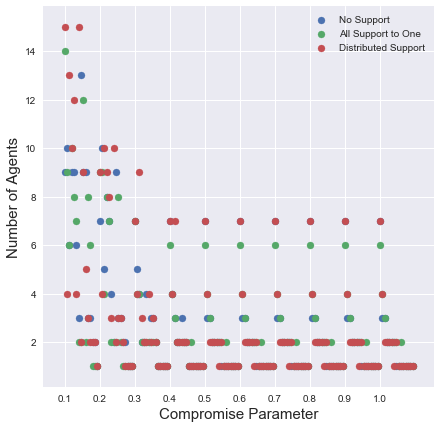

In [12]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
#ax2 = ax.twiny()


ax.set_xticks([0, 15, 30, 45,60, 75, 90, 105, 120, 135])
ax.set_xticklabels([0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9, 1.0],fontsize = 10)
#ax.set_yticklabels(["", 10, 20, 30, 40, 50, 60, 70], fontsize=10)
ax.set_xlabel("Compromise Parameter", fontsize = 15)
ax.set_ylabel("Number of Agents", fontsize = 15)

ax.scatter(x1,y0, label = "No Support")
ax.scatter(x1,y1, label = "All Support to One")
ax.scatter(x1,y2, label = "Distributed Support")
#plt.title("Number of Tribes with Varying Compromise and Effectiveness", y= 1.1, fontsize = 20)
ax.legend()

# Produces graph of run compromise = .3 

In [13]:
def make_y(y): 
    vals = []
    y_str = str(y)
    y_int = int(y_str[1])
    for v in results[y_int][2].values():
        vals.append(v)
    return vals[30:45]

In [14]:
x1 = []
for x in results[0][2].keys():
    x1.append(x)
x1 = x1[30:45]
y0 = make_y('y0')
y1 = make_y('y1')
#C = map(lambda x: (float(5)/9)*(x-32), Fahrenheit)
y1 = list(map(lambda x: x + .1, y1))
    

y2 = make_y('y2')
y2 = list(map(lambda x: x - .1, y2))

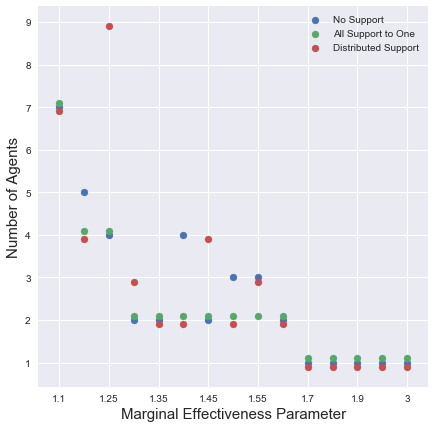

In [16]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
#ax2 = ax.twiny()
ax.scatter(x1,y0, label = "No Support")
ax.scatter(x1,y1, label = "All Support to One")
ax.scatter(x1,y2, label = "Distributed Support")

#ax.set_xticks(range(0,15))
#ax2.set_xlim(ax.get_xlim())
#ax2.set_xticklabels([0.1, 0.2, 0.3, 0.4], fontsize = 10)
#ax2.set_xticks([0, 15, 30, 45])
ax.set_xticklabels([0, 1.1, 1.25, 1.35, 1.45, 1.55, 1.7, 1.9, 3],fontsize = 10)
#ax.set_yticklabels(["", "", "", "", "", "", "", ""], fontsize=10)
ax.set_xlabel("Marginal Effectiveness Parameter", fontsize = 15)
#ax2.set_xlabel("Compromise Parameter", fontsize = 15)
ax.set_ylabel("Number of Agents", fontsize = 15)
#plt.title("Number of Tribes with Varying Compromise and Effectiveness \n (runs 0-60) ", y= 1.1, fontsize = 20)
ax.legend()

# Figure 4 ME of 1.25,1.3, 1.35, 1.5, comp of .1

In [48]:
x = []
x1 =[]
x2 = []
y = []
y1 = []
z = []
 
for t in results[0][1][2]["Tribes"]:
    x.append(t[0])
    y.append(t[1])
    x2.append(round(float(t[2]),2))
for t in x: 
    if "." not in t: 
        x1.append(t)
        z.append(1)
    else: 
        count = 1
        p = t.find(".")
        for i in t: 
            if i == '.': 
                count += 1
        if "Al-Ubaidat1" in t: 
            t = "Al-Ubaidat1"
        else:
            t= t[:p]
    
    #t= t[:p]
        x1.append(t)
        z.append(count)
for num in y:
    y1.append(float(num)) 
xpos = np.arange(len(x2))
mean_tribe = round(np.mean(z),2)
x2

[0.06, 0.01, 1.0, 0.32, 0.78, 0.56]

In [49]:
z

[1, 1, 1, 29, 45, 47]

['Unaffiliated2', 'Tebu', 'Unaffiliated11', 'Al-Ubaidat1', 'Unaffiliated1', 'Saada17']


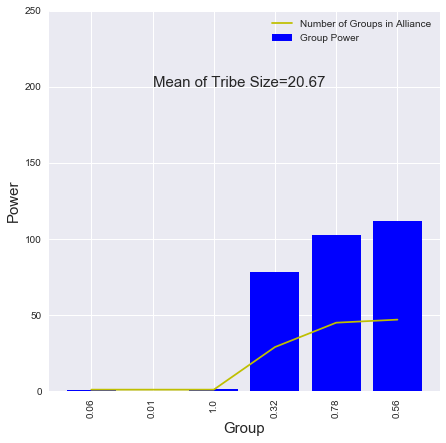

In [50]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

colors = []
for x in x1: 
    if x == 'Al-Ubaidat1':
        colors.append('b')
    else:
        colors.append('b')

ax.bar(xpos, y1, align='center', color=colors, label = "Group Power")
ax.plot(xpos,z, color = 'y', label = "Number of Groups in Alliance")
ax.set_xticks(xpos)
ax.set_xticklabels(x2,rotation = 90, fontsize = 10)
ax.set_xlabel("Group", fontsize =15)
ax.set_ylabel("Power", fontsize = 15)
ax.set_ylim([0,250])
#plt.title("Alliances With Support to One \n (comp: 0.1; ME: 1.25)", fontsize = 20)
plt.text(1, 200, "Mean of Tribe Size=" + str(mean_tribe), fontsize=15)
plt.legend()
sames = x1
print (sames)

In [51]:
x = []
x1 =[]
x2 = []
y = []
y1 = []
z = []
 
for t in results[0][1][3]["Tribes"]:
    x.append(t[0])
    y.append(t[1])
    x2.append(round(float(t[2]),2))
for t in x: 
    if "." not in t: 
        x1.append(t)
        z.append(1)
    else: 
        count = 1
        p = t.find(".")
        for i in t: 
            if i == '.': 
                count += 1
        if "Al-Ubaidat1" in t: 
            t = "Al-Ubaidat1"
        else:
            t= t[:p]
    
    #t= t[:p]
        x1.append(t)
        z.append(count)
for num in y:
    y1.append(float(num)) 
xpos = np.arange(len(x2))
mean_tribe = round(np.mean(z),2)
x2

[0.01, 0.99, 1.0, 0.99, 0.96, 0.99, 0.99, 0.65, 0.32]

['Tebu', 'Unaffiliated10', 'Unaffiliated11', 'Unaffiliated1', 'Unaffiliated6', 'Unaffiliated15', 'Unaffiliated18', 'Saada17', 'Al-Ubaidat1']


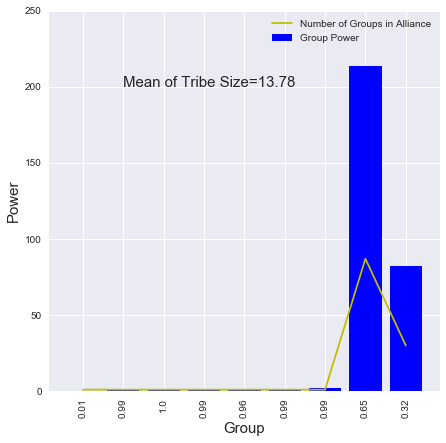

In [52]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

colors = []
for x in x1: 
    if x == 'Al-Ubaidat1':
        colors.append('b')
    else:
        colors.append('b')

ax.bar(xpos, y1, align='center', color=colors, label = "Group Power")
ax.plot(xpos,z, color = 'y', label = "Number of Groups in Alliance")
ax.set_xticks(xpos)
ax.set_xticklabels(x2,rotation = 90, fontsize = 10)
ax.set_xlabel("Group", fontsize =15)
ax.set_ylabel("Power", fontsize = 15)
ax.set_ylim([0,250])
#plt.title("Alliances With Support to One \n (comp: 0.1; ME: 1.3)", fontsize = 20)
plt.text(1, 200, "Mean of Tribe Size=" + str(mean_tribe), fontsize=15)
plt.legend()
sames = x1
print (sames)

# ME 1.35, comp .1

In [53]:
x = []
x1 =[]
x2 = []
y = []
y1 = []
z = []
 
for t in results[0][1][4]["Tribes"]:
    x.append(t[0])
    y.append(t[1])
    x2.append(round(float(t[2]),2))
for t in x: 
    if "." not in t: 
        x1.append(t)
        z.append(1)
    else: 
        count = 1
        p = t.find(".")
        for i in t: 
            if i == '.': 
                count += 1
        if "Al-Ubaidat1" in t: 
            t = "Al-Ubaidat1"
        else:
            t= t[:p]
    
    #t= t[:p]
        x1.append(t)
        z.append(count)
for num in y:
    y1.append(float(num)) 
xpos = np.arange(len(x2))
mean_tribe = round(np.mean(z),2)
x2

[0.01, 0.99, 0.96, 0.99, 0.99, 0.99, 1.0, 0.64, 0.32]

['Tebu', 'Unaffiliated1', 'Unaffiliated6', 'Unaffiliated15', 'Unaffiliated18', 'Unaffiliated10', 'Unaffiliated11', 'Unaffiliated3', 'Al-Ubaidat1']


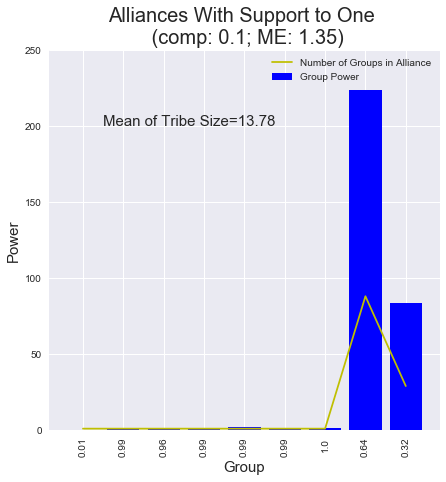

In [54]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

colors = []
for x in x1: 
    if x == 'Al-Ubaidat1':
        colors.append('b')
    else:
        colors.append('b')

ax.bar(xpos, y1, align='center', color=colors, label = "Group Power")
ax.plot(xpos,z, color = 'y', label = "Number of Groups in Alliance")
ax.set_xticks(xpos)
ax.set_xticklabels(x2,rotation = 90, fontsize = 10)
ax.set_xlabel("Group", fontsize =15)
ax.set_ylabel("Power", fontsize = 15)
ax.set_ylim([0,250])
plt.title("Alliances With Support to One \n (comp: 0.1; ME: 1.35)", fontsize = 20)
plt.text(0.5, 200, "Mean of Tribe Size=" + str(mean_tribe), fontsize=15)
plt.legend()
sames = x1
print (sames)

# ME 1.4, comp .1

In [55]:
x = []
x1 =[]
x2 = []
y = []
y1 = []
z = []
 
for t in results[0][1][5]["Tribes"]:
    x.append(t[0])
    y.append(t[1])
    x2.append(round(float(t[2]),2))
for t in x: 
    if "." not in t: 
        x1.append(t)
        z.append(1)
    else: 
        count = 1
        p = t.find(".")
        for i in t: 
            if i == '.': 
                count += 1
        if "Al-Ubaidat1" in t: 
            t = "Al-Ubaidat1"
        else:
            t= t[:p]
    
    #t= t[:p]
        x1.append(t)
        z.append(count)
for num in y:
    y1.append(float(num)) 
xpos = np.arange(len(x2))
mean_tribe = round(np.mean(z),2)
x2

[0.06, 0.01, 0.15, 0.18, 0.49, 0.81]

['Unaffiliated2', 'Tebu', 'Saada3', 'Saada5', 'Al-Ubaidat1', 'Unaffiliated3']


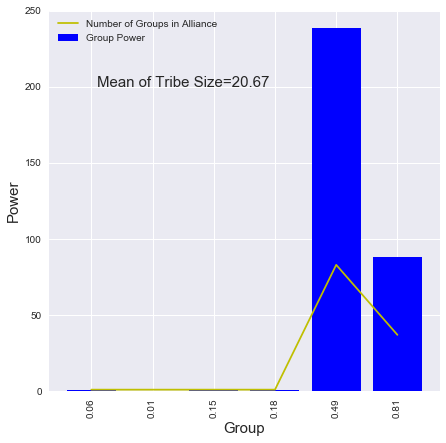

In [60]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

colors = []
for x in x1: 
    if x == 'Al-Ubaidat1':
        colors.append('b')
    else:
        colors.append('b')

ax.bar(xpos, y1, align='center', color=colors, label = "Group Power")
ax.plot(xpos,z, color = 'y', label = "Number of Groups in Alliance")
ax.set_xticks(xpos)
ax.set_xticklabels(x2,rotation = 90, fontsize = 10)
ax.set_xlabel("Group", fontsize =15)
ax.set_ylabel("Power", fontsize = 15)
ax.set_ylim([0,250])
#plt.title("Alliances With Support to One \n (comp: 0.1; ME: 1.4)", fontsize = 20)
plt.text(0.1, 200, "Mean of Tribe Size=" + str(mean_tribe), fontsize=15)
plt.legend()
sames = x1
print (sames)

# ME 1.45 COM .1

In [66]:
x = []
x1 =[]
x2 = []
y = []
y1 = []
z = []
 
for t in results[0][1][6]["Tribes"]:
    x.append(t[0])
    y.append(t[1])
    x2.append(round(float(t[2]),2))
for t in x: 
    if "." not in t: 
        x1.append(t)
        z.append(1)
    else: 
        count = 1
        p = t.find(".")
        for i in t: 
            if i == '.': 
                count += 1
        if "Al-Ubaidat1" in t: 
            t = "Al-Ubaidat1"
        else:
            t= t[:p]
    
    #t= t[:p]
        x1.append(t)
        z.append(count)
for num in y:
    y1.append(float(num)) 
xpos = np.arange(len(x2))
mean_tribe = round(np.mean(z),2)
x2

[0.01, 0.71, 0.4]

['Tebu', 'Saada20', 'Al-Ubaidat1']


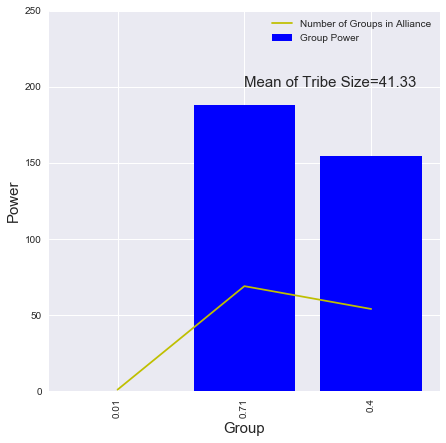

In [67]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

colors = []
for x in x1: 
    if x == 'Al-Ubaidat1':
        colors.append('b')
    else:
        colors.append('b')

ax.bar(xpos, y1, align='center', color=colors, label = "Group Power")
ax.plot(xpos,z, color = 'y', label = "Number of Groups in Alliance")
ax.set_xticks(xpos)
ax.set_xticklabels(x2,rotation = 90, fontsize = 10)
ax.set_xlabel("Group", fontsize =15)
ax.set_ylabel("Power", fontsize = 15)
ax.set_ylim([0,250])
#plt.title("Alliances With Support to One \n (comp: 0.1; ME: 1.45)", fontsize = 20)
plt.text(1, 200, "Mean of Tribe Size=" + str(mean_tribe), fontsize=15)
plt.legend()
sames = x1
print (sames)

# 1.5 ME

In [68]:
x = []
x1 =[]
x2 = []
y = []
y1 = []
z = []
 
for t in results[0][1][7]["Tribes"]:
    x.append(t[0])
    y.append(t[1])
    x2.append(round(float(t[2]),2))
for t in x: 
    if "." not in t: 
        x1.append(t)
        z.append(1)
    else: 
        count = 1
        p = t.find(".")
        for i in t: 
            if i == '.': 
                count += 1
        if "Al-Ubaidat1" in t: 
            t = "Al-Ubaidat1"
        else:
            t= t[:p]
    
    #t= t[:p]
        x1.append(t)
        z.append(count)
for num in y:
    y1.append(float(num)) 
xpos = np.arange(len(x2))
mean_tribe = round(np.mean(z),2)
x2

[0.99, 1.0, 0.99, 0.96, 0.99, 0.99, 0.15, 0.06, 0.01, 0.19, 0.19, 0.18, 0.56]

['Unaffiliated10', 'Unaffiliated11', 'Unaffiliated1', 'Unaffiliated6', 'Unaffiliated15', 'Unaffiliated18', 'Saada3', 'Unaffiliated2', 'Tebu', 'Saada2', 'Saada4', 'Saada5', 'Al-Ubaidat1']


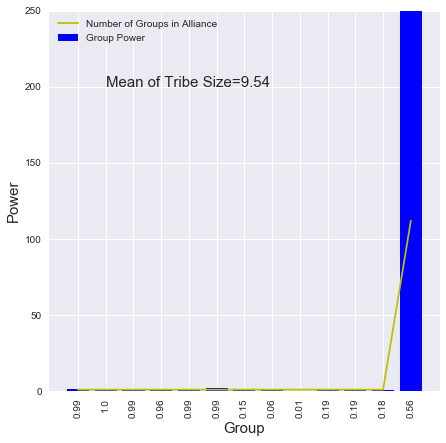

In [69]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

colors = []
for x in x1: 
    if x == 'Al-Ubaidat1':
        colors.append('b')
    else:
        colors.append('b')

ax.bar(xpos, y1, align='center', color=colors, label = "Group Power")
ax.plot(xpos,z, color = 'y', label = "Number of Groups in Alliance")
ax.set_xticks(xpos)
ax.set_xticklabels(x2,rotation = 90, fontsize = 10)
ax.set_xlabel("Group", fontsize =15)
ax.set_ylabel("Power", fontsize = 15)
ax.set_ylim([0,250])
#plt.title("Alliances With Support to One \n (comp: 0.1; ME: 1.5)", fontsize = 20)
plt.text(1, 200, "Mean of Tribe Size=" + str(mean_tribe), fontsize=15)
plt.legend()
sames = x1
print (sames)

In [96]:
y1colors = []


[1.5,
 1.4500000000000002,
 0.8,
 1.35,
 1.65,
 2.25,
 0.45,
 3.1,
 1.05,
 1.05,
 313.06500000000005,
 104.15249999999999]

ValueError: incompatible sizes: argument 'height' must be length 22 or scalar

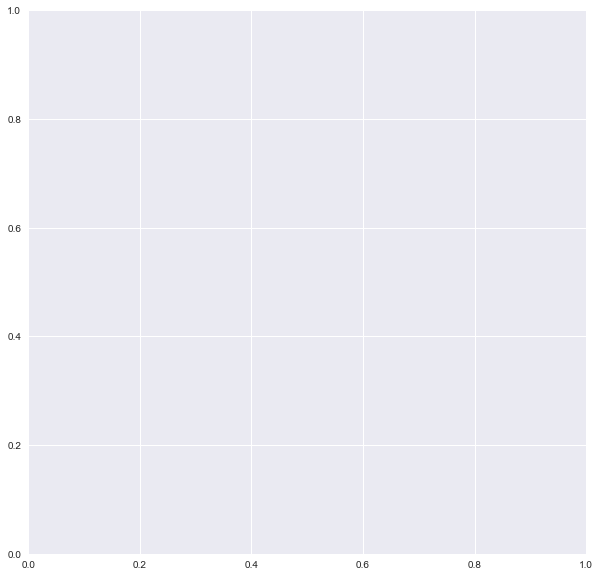

In [97]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

colors = []
for x in x1: 
    if x[-1] == '*':
        colors.append('r')
    else:
        colors.append('b')

ax.bar(xpos, y1, align='center', color=colors, label = "Group Power")
ax.plot(xpos,z, color = 'y', label = "Number of Groups in Alliance")
ax.set_xticks(xpos)
ax.set_xticklabels(x2,rotation = 90, fontsize = 10)
ax.set_xlabel("Group", fontsize =15)
ax.set_ylabel("Power", fontsize = 15)
ax.set_ylim([0,250])
plt.title("Alliances With Support to Many (run 75)", fontsize = 20)
plt.text(0, 200, "Mean of Tribe Size=" + str(mean_tribe), fontsize=15)
plt.legend()

In [48]:
c = 0
for item in results[0][1][75]["Tribes"]:
    if item[0] in results[1][1][75]["Tribes"]:
        c += 1
print (len(results[1][1][75]["Tribes"]))
print (len(results[0][1][75]["Tribes"]))
print (c)

6
7
0


In [49]:
results[0][1][1]["Tribes"]

[['Unaffiliated2', '0.65', '0.06382978723404255'],
 ['Tebu', '0.35', '0.010638297872340425'],
 ['Unaffiliated10', '1.5', '0.9893617021276596'],
 ['Unaffiliated11', '1.4500000000000002', '1.0'],
 ['Unaffiliated1', '0.8', '0.9893617021276596'],
 ['Unaffiliated15', '1.65', '0.9893617021276596'],
 ['Unaffiliated18', '2.25', '0.9893617021276596'],
 ['Saada1.Saada7.Saada6.Saada8.Saada2.Saada4.Saada3.Saada5.Saada12.Saada14.Saada16.al-Rahmana.al-Habun1.Saada9.Saada11.Unaffiliated7.Unaffiliated9.Saada10.Saada13.Saada15.Hasawna.Al-Ubaidat1.Ulum.Al-Ubaidat2.Msika.Masamir.Masimir.al-Marirat.al-Qunashat',
  '75.12',
  '0.31916412966105495'],
 ['el-Mahjoub.Zamoura.al-Sawalih.Marghara4.Marghara3.Jmamla.Kargala.Warfalla5.Marghara1.Zawayia9.Warfalla4.Zawayia10.Marghara2.Zawayia11.Sadat.Sabayi.Saada17.Unaffiliated14.Saada18.Unaffiliated8.Beni Salim.Beni Salim2.Magariha.al-Mujabra.Saada20.Zawayia3.Zawayia2.Taureg1.Kawar.Taureg2.Beni Hilal.Gaddafi.Saada19.Zawayia1.Saada21.Zawayia4.Unaffiliated16.Taureg5.Z

In [50]:
results[0][1][3]["Tribes"]

[['Tebu', '0.35', '0.010638297872340425'],
 ['Unaffiliated10', '1.5', '0.9893617021276596'],
 ['Unaffiliated11', '1.4500000000000002', '1.0'],
 ['Unaffiliated1', '0.8', '0.9893617021276596'],
 ['Unaffiliated6', '1.35', '0.9574468085106382'],
 ['Unaffiliated15', '1.65', '0.9893617021276596'],
 ['Unaffiliated18', '2.25', '0.9893617021276596'],
 ['Saada17.Unaffiliated14.Saada18.Unaffiliated8.Beni Salim.Beni Salim2.Magariha.al-Mujabra.Kawar.Taureg2.Beni Hilal.Gaddafi.Zawayia2.Taureg1.Zawayia3.Zawayia4.Saada19.Zawayia1.Saada20.Saada21.el-Mahjoub.Unaffiliated16.Zawayia8.Taureg4.al-Jarsha.Taureg3.Warfalla6.Warfalla7.Warfalla8.Zawayia5.Zawayia6.Zawayia7.Dababisa.Mtarfa1.Unaffiliated5.Kawafi.Ramla.Unaffiliated17.Unaffiliated4.Warfalla1.Zawaiya.Zawiya.Unaffiliated13.Matarfa2.Warfalla2.Warfalla3.Unaffiliated3.Marghara9.Marghara11.Marghara10.Warfalla11.Warfalla12.Warfalla14.Warfalla13.Magharha.Zamoura.Marghara4.al-Sawalih.Warfalla5.Marghara3.Jmamla.Kargala.Zawayia11.Marghara1.Zawayia9.Warfalla4.Ta

In [51]:
def aff_val(lst):
    aff = []
    for e in lst: 
        aff.append(e[2])
    return aff

def tribe_pull(dict): 
    stat = {}
    stat["Comp"] = dict["Comp"]
    stat["Efficiency"] = dict['Efficieny']
    size = []
    for each in dict['Tribes']:
        count = 1
        for e in each[0]:
            if e == ".":
                count += 1
        if count > 1: 
            count += 1
        size.append(count)  
    stat['size'] = size
    stat['affinity'] = aff_val(dict['Tribes'])
    return stat

tribe_dict1 = {}
tribe_dict2 = {}
tribe_dict3 = {}
#for i in results: 
for k,v in results[0][1].items(): 
    tribe_dict1[k] = tribe_pull(v)

for k,v in results[1][1].items(): 
    tribe_dict2[k] = tribe_pull(v)    

for k,v in results[2][1].items(): 
    tribe_dict3[k] = tribe_pull(v)
    


In [52]:
tribe_dict1
    

{0: {'Comp': '0.1',
  'Efficiency': '1.1',
  'affinity': ['0.9255319148936169',
   '0.4361702127659574',
   '0.6696631237380433',
   '0.5394003266944667',
   '0.045212765957446804',
   '0.18310113669484115',
   '0.9862629171420028',
   '0.8136412426806138',
   '0.3295620394646365'],
  'size': [1, 1, 30, 38, 3, 6, 7, 21, 24]},
 1: {'Comp': '0.1',
  'Efficiency': '1.2',
  'affinity': ['0.06382978723404255',
   '0.010638297872340425',
   '0.9893617021276596',
   '1.0',
   '0.9893617021276596',
   '0.9893617021276596',
   '0.9893617021276596',
   '0.31916412966105495',
   '0.5566294546158007',
   '0.760983928475737'],
  'size': [1, 1, 1, 1, 1, 1, 1, 30, 49, 41]},
 2: {'Comp': '0.1',
  'Efficiency': '1.25',
  'affinity': ['0.06382978723404255',
   '0.010638297872340425',
   '1.0',
   '0.3188743694856282',
   '0.7751266313129039',
   '0.556162577335132'],
  'size': [1, 1, 1, 30, 46, 48]},
 3: {'Comp': '0.1',
  'Efficiency': '1.3',
  'affinity': ['0.010638297872340425',
   '0.9893617021276596

In [53]:
tribe_dict2

{0: {'Comp': '0.1',
  'Efficiency': '1.1',
  'affinity': ['0.9255319148936169',
   '0.40425531914893614',
   '0.19148936170212766',
   '0.19148936170212766',
   '0.14893617021276595',
   '0.18085106382978722',
   '0.425531914893617',
   '0.4361702127659574',
   '0.3001628454480349',
   '0.551640922531111',
   '0.045212765957446804',
   '0.9862629171420028',
   '0.8136412426806138',
   '0.6941758630815685'],
  'size': [1, 1, 1, 1, 1, 1, 1, 1, 23, 46, 3, 7, 21, 22]},
 1: {'Comp': '0.1',
  'Efficiency': '1.2',
  'affinity': ['0.9893617021276596',
   '1.0',
   '0.9893617021276596',
   '0.9893617021276596',
   '0.9893617021276596',
   '0.30002234927546',
   '0.5566294546158007',
   '0.760983928475737',
   '0.045212765957446804'],
  'size': [1, 1, 1, 1, 1, 30, 49, 41, 3]},
 2: {'Comp': '0.1',
  'Efficiency': '1.25',
  'affinity': ['0.06382978723404255',
   '0.010638297872340425',
   '1.0',
   '0.29990268662912833',
   '0.7751266313129039',
   '0.556162577335132'],
  'size': [1, 1, 1, 30, 46,

In [54]:
tribe_dict3

{0: {'Comp': '0.1',
  'Efficiency': '1.1',
  'affinity': ['0.9255319148936169',
   '0.5212765957446809',
   '0.5212765957446809',
   '0.5212765957446809',
   '0.7340425531914894',
   '0.7340425531914894',
   '0.7446808510638298',
   '0.7446808510638298',
   '0.2047872340425532',
   '0.48051292243655463',
   '0.8136412426806138',
   '0.31678991828460096',
   '0.6237230154987885',
   '0.045212765957446804',
   '0.9862629171420028'],
  'size': [1, 1, 1, 1, 1, 1, 1, 1, 9, 16, 21, 20, 47, 3, 7]},
 1: {'Comp': '0.1',
  'Efficiency': '1.2',
  'affinity': ['0.8798414559200048',
   '0.3093597158000641',
   '0.6172078321881976',
   '0.045212765957446804'],
  'size': [22, 30, 73, 3]},
 2: {'Comp': '0.1',
  'Efficiency': '1.25',
  'affinity': ['0.06382978723404255',
   '0.010638297872340425',
   '0.9893617021276596',
   '0.9574468085106382',
   '0.9893617021276596',
   '0.9893617021276596',
   '0.9255319148936169',
   '0.9893617021276596',
   '1.0',
   '0.8936170212765957',
   '0.8936170212765957'

In [55]:
results[0][1][93]['Tribes']

[['Saada17.Unaffiliated14.Saada18.Unaffiliated8.Beni Salim.Beni Salim2.Magariha.al-Mujabra.Kawar.Taureg2.Beni Hilal.Gaddafi.Zawayia2.Taureg1.Zawayia3.Zawayia4.Saada19.Zawayia1.Saada20.Saada21.el-Mahjoub.Unaffiliated16.Zawayia8.Taureg4.al-Jarsha.Taureg3.Warfalla6.Warfalla7.Warfalla8.Zawayia5.Zawayia6.Zawayia7.Dababisa.Mtarfa1.Unaffiliated5.Kawafi.Ramla.Unaffiliated17.Unaffiliated4.Warfalla1.Zawaiya.Zawiya.Unaffiliated13.Matarfa2.Warfalla2.Warfalla3.Unaffiliated3.Unaffiliated10.Unaffiliated11.Unaffiliated1.Unaffiliated6.Unaffiliated15.Unaffiliated18.Marghara9.Marghara11.Marghara10.Warfalla11.Warfalla12.Warfalla14.Warfalla13.Magharha.Zamoura.Marghara4.al-Sawalih.Warfalla5.Marghara3.Jmamla.Kargala.Zawayia11.Marghara1.Zawayia9.Warfalla4.Taureg5.Marghara2.Zawayia10.Sadat.Sabayi.Marghara5.Warfalla9.Unaffiliated12.Awlad Sulaiman.Marghara6.Awlad Bu Saif.Maslata.Masrata.Marghara7.Tawajeer.Marghara8.al-Awaqir.Warfalla10.Warfalla15.Warfalla16.Warfalla17',
  '225.16',
  '0.6708673488731521'],
 ['Sa

In [56]:
results[0][1][98]['Tribes']

[['Unaffiliated2.Saada3.Saada15.Tebu.Saada1.Saada7.Saada8.Saada12.Saada2.Saada4.Saada5.Saada6.Al-Ubaidat1.Al-Ubaidat2.al-Rahmana.al-Habun1.Masamir.Ulum.al-Marirat.al-Qunashat.Masimir.Msika.Saada9.Saada11.Saada10.Saada13.Saada14.Saada16.Unaffiliated3.Unaffiliated16.Unaffiliated7.Hasawna.Saada19.Zawayia2.Saada20.Saada21.Saada17.Unaffiliated9.Magariha.al-Mujabra.Saada18.Unaffiliated8.Unaffiliated14.Zawayia1.el-Mahjoub.Zawayia7.Zawayia3.Zawayia4.Warfalla8.Zawayia6.Zawayia8.Taureg4.Kawar.Taureg2.Zawayia5.Taureg1.Beni Salim.Beni Salim2.Beni Hilal.Gaddafi.Unaffiliated1.Unaffiliated6.Unaffiliated15.Unaffiliated18.Unaffiliated13.Matarfa2.Warfalla2.Warfalla3.Unaffiliated4.Warfalla1.Zawaiya.Zawiya.Dababisa.Mtarfa1.Unaffiliated10.Unaffiliated11.al-Jarsha.Taureg3.Warfalla6.Warfalla7.Marghara1.Zawayia9.Zawayia10.Taureg5.Marghara2.Zawayia11.Sadat.Jmamla.Kargala.Sabayi.Warfalla4.Warfalla5.Unaffiliated5.Ramla.Marghara10.Unaffiliated17.Marghara9.Marghara11.Warfalla11.Warfalla12.Marghara7.Tawajeer.Margha

# Group one mean calculations

In [57]:
x = []
x1 =[]
y = []
y1 = []
z = []
 

for t in results[0][1][0]["Tribes"]:
    x.append(t[0])
    y.append(t[2])
for t in x: 
    if "." not in t: 
        x1.append(t)
        z.append(1)
        
    else: 
        count = 1
        p = t.find(".")
        for i in t: 
            if i == '.': 
                count += 1
        t= t[:p]
        x1.append(t)
        z.append(count)
for num in y:
    y1.append(float(num)) 
xpos = np.arange(len(x1))
mean_tribe = round(np.mean(z),2)
mean_tribe

13.779999999999999

['Unaffiliated3', 'Unaffiliated9', 'Zamoura', 'el-Mahjoub', 'Unaffiliated2', 'Saada3', 'Unaffiliated10', 'Zawaiya', 'Saada1']


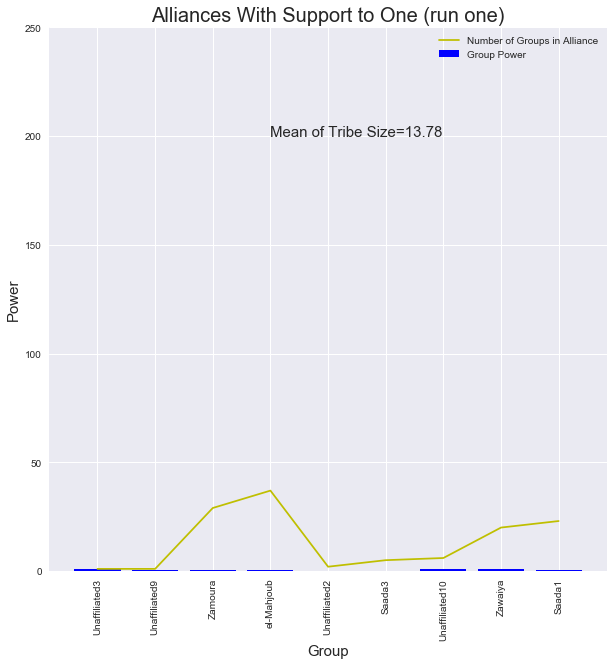

In [58]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

colors = []
for x in x1: 
    if x == 'Al-Ubaidat1':
        colors.append('r')
    else:
        colors.append('b')

ax.bar(xpos, y1, align='center', color=colors, label = "Group Power")
ax.plot(xpos,z, color = 'y', label = "Number of Groups in Alliance")
ax.set_xticks(xpos)
ax.set_xticklabels(x1,rotation = 90, fontsize = 10)
ax.set_xlabel("Group", fontsize =15)
ax.set_ylabel("Power", fontsize = 15)
ax.set_ylim([0,250])
plt.title("Alliances With Support to One (run one)", fontsize = 20)
plt.text(3, 200, "Mean of Tribe Size=" + str(mean_tribe), fontsize=15)
plt.legend()
sames = x1
print (sames)

In [59]:
x = []
x1 =[]
y = []
y1 = []
z = []

supported = ["Awlad Sulaiman", "Al-Ubaidat1", "Sadat"]

for t in results[2][1][0]["Tribes"]:
    x.append(t[0])
    y.append(t[1])
#print (x)
for t in x: 
    support = 0 
    #print (t)
    if "." not in t: 
        x1.append(t)
        z.append(1)
    else: 
        count = 1
        p = t.find(".")
        for i in t: 
        
            if i == '.': 
            
                #print (stop)
                count += 1
            
    for s in supported: 
        if s in t: 
            support += 1
                
    
    t = t[:p] + ('*' * support)
    x1.append(t)
    z.append(count)

    
for num in y:
    y1.append(float(num)) 
xpos = np.arange(len(x1))
mean_tribe = round(np.mean(z),2)
mean_tribe

13.390000000000001

ValueError: incompatible sizes: argument 'height' must be length 23 or scalar

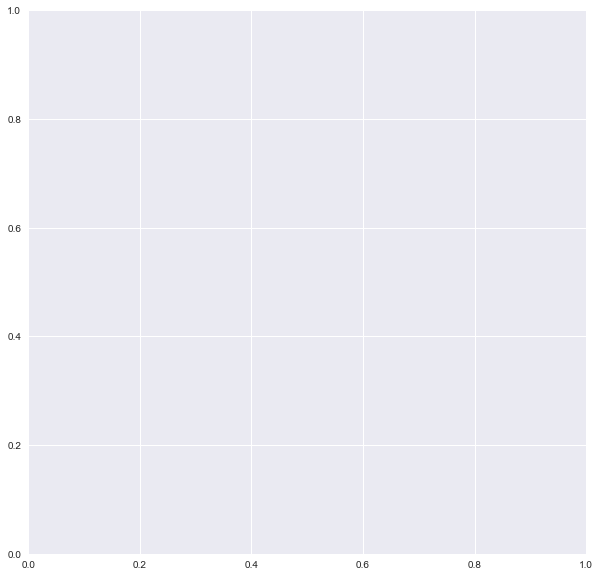

In [60]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

colors = []
for x in x1: 
    if x[-1] == '*':
        colors.append('r')
    else:
        colors.append('b')

ax.bar(xpos, y1, align='center', color=colors, label = "Group Power")
ax.plot(xpos,z, color = 'y', label = "Number of Groups in Alliance")
ax.set_xticks(xpos)
ax.set_xticklabels(x1,rotation = 90, fontsize = 10)
ax.set_xlabel("Group", fontsize =15)
ax.set_ylabel("Power", fontsize = 15)
ax.set_ylim([0,250])
plt.title("Alliances With Support to Many (run 75)", fontsize = 20)
plt.text(0, 200, "Mean of Tribe Size=" + str(mean_tribe), fontsize=15)
plt.legend()

In [61]:
def list_aff(vals):
    aff_list = []
    for item in vals["Tribes"]:
        aff_list.append(item[2])
    return aff_list



aff_dict = {}
for t in results: 
    for k,v in t[1].items():
        if k not in aff_dict: 
            aff_dict[k] = [list_aff(v)]
        else: 
            aff_dict[k].append(list_aff(v))
aff_dict

{0: [['0.9255319148936169',
   '0.4361702127659574',
   '0.6696631237380433',
   '0.5394003266944667',
   '0.045212765957446804',
   '0.18310113669484115',
   '0.9862629171420028',
   '0.8136412426806138',
   '0.3295620394646365'],
  ['0.9255319148936169',
   '0.40425531914893614',
   '0.19148936170212766',
   '0.19148936170212766',
   '0.14893617021276595',
   '0.18085106382978722',
   '0.425531914893617',
   '0.4361702127659574',
   '0.3001628454480349',
   '0.551640922531111',
   '0.045212765957446804',
   '0.9862629171420028',
   '0.8136412426806138',
   '0.6941758630815685'],
  ['0.9255319148936169',
   '0.5212765957446809',
   '0.5212765957446809',
   '0.5212765957446809',
   '0.7340425531914894',
   '0.7340425531914894',
   '0.7446808510638298',
   '0.7446808510638298',
   '0.2047872340425532',
   '0.48051292243655463',
   '0.8136412426806138',
   '0.31678991828460096',
   '0.6237230154987885',
   '0.045212765957446804',
   '0.9862629171420028']],
 1: [['0.06382978723404255',
  

In [62]:
xvals1 = []
xvals2 = []
xvals3 = []
yvals1 = []
yvals2 = []
yvals3 = []

for k,v in aff_dict.items():
   
   
    
    for each in v[0]:
        xvals1.append(k)
        yvals1.append(each)
    for each in v[1]:
        xvals2.append(k)
        yvals2.append(each)
    for each in v[2]:
        xvals3.append(k)
        yvals3.append(each)
        
            

    
    

In [63]:
yvals2 = list(map(lambda x: x + .01, y2))
yvals3 = list(map(lambda x: x - .01, y2))

In [64]:
xstart1 = xvals1.index(15)
xstart2 = xvals2.index(15)
xstart3 = xvals3.index(15)
xstop1 = xvals1.index(29)
xstop2 = xvals2.index(29)
xstop3 = xvals3.index(29)

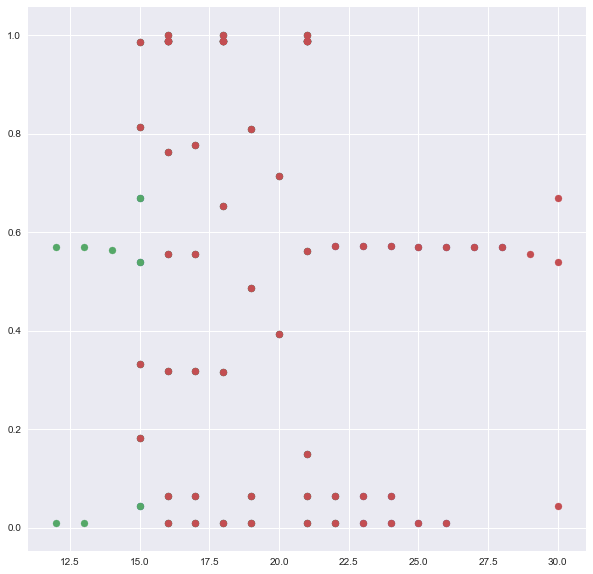

In [65]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)



ax.scatter(xvals1[xstart1:xstop1],yvals1[xstart1:xstop1])
ax.scatter(xvals1[xstart2:xstop2],yvals1[xstart2:xstop2])
ax.scatter(xvals1[xstart3:xstop3],yvals1[xstart3:xstop3])